<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center">Feel free to contact TA team for any possible questions about the assignment</h5>
<h5 align="center">Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </h5>
<h4 align="center"><font color="cyan"> Shervin Mehrtash</h4>
<h4 align="center"><font color="cyan"> SID: 400102052</h4>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1]:
# import required packages
import csv
import numpy as np
import random
import math
import string
import pandas as pd
import matplotlib.pyplot as plt

Predicted Results in Years 2016-2020 for K = 3


,Year,Car,Bus
0,2016.0,1.079113e+07,250684.753548
1,2017.0,1.135646e+07,260030.129904
2,2018.0,1.194129e+07,269525.793520
3,2019.0,1.254596e+07,279169.842333
4,2020.0,1.317080e+07,288960.374284


Predicted Results in Years 2016-2020 for K = 4


,Year,Car,Bus
0,2016.0,1.085577e+07,235522.286141
1,2017.0,1.144644e+07,238921.596848
2,2018.0,1.206102e+07,241442.068066
3,2019.0,1.270020e+07,242991.182802
4,2020.0,1.336472e+07,243473.067952


Predicted Results in Years 2016-2020 for K = 5


,Year,Car,Bus
0,2016.0,1.124644e+07,216376.739930
1,2017.0,1.206693e+07,208513.964628
2,2018.0,1.297318e+07,196740.249756
3,2019.0,1.397525e+07,180505.402838
4,2020.0,1.508399e+07,159217.735664


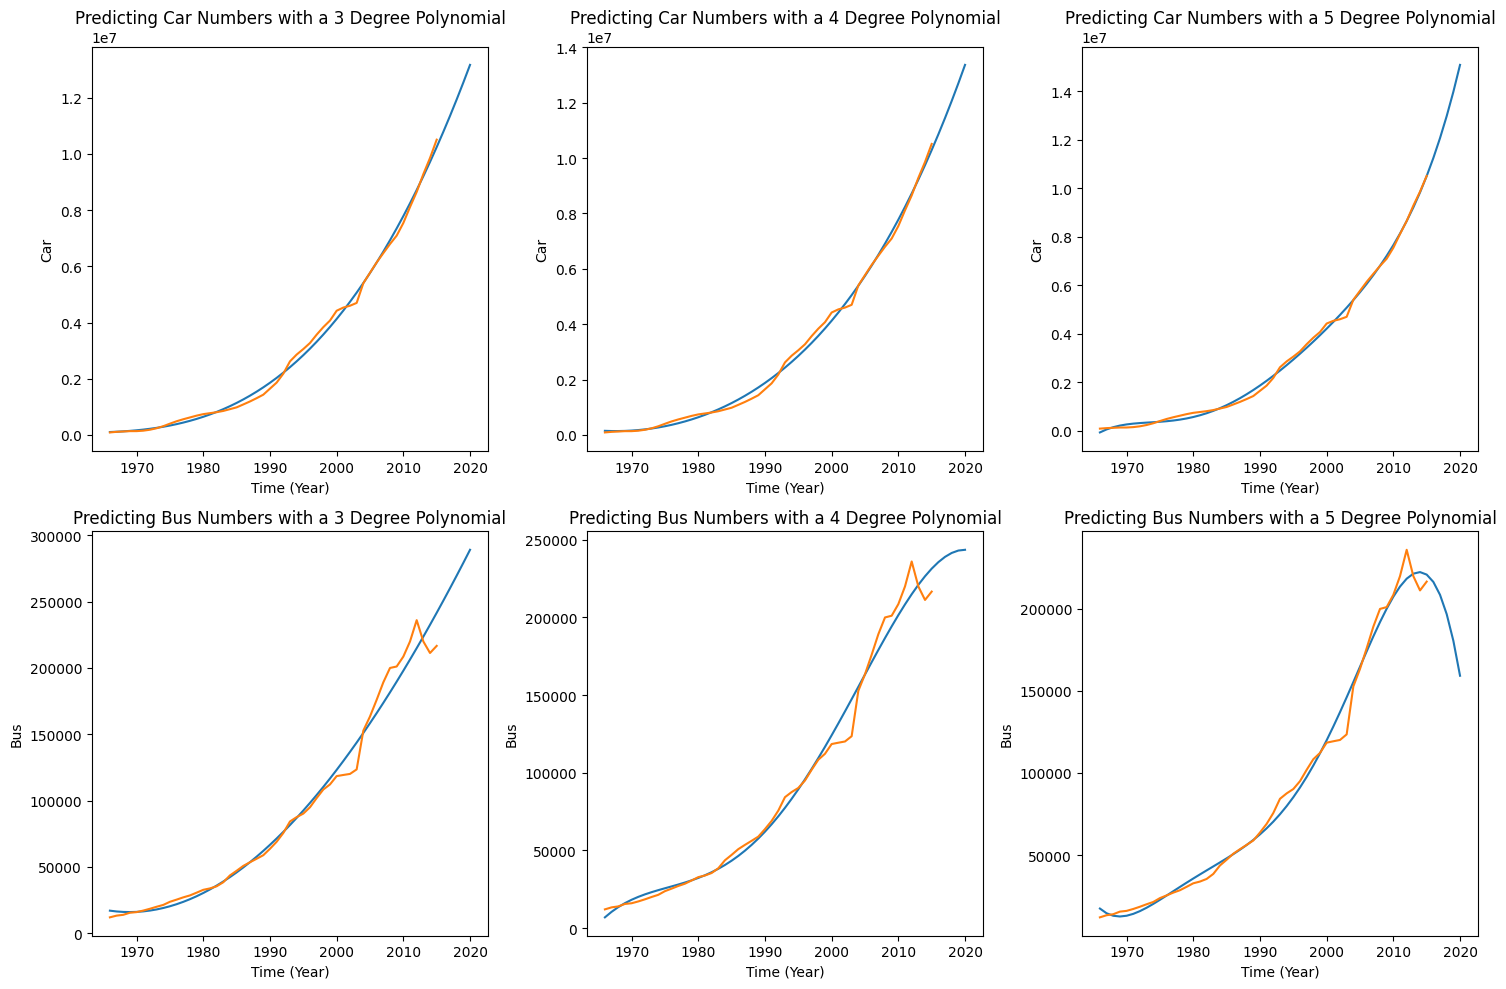

In [2]:
# Code cell
# Loading the Datafile into environment
Data = pd.read_csv('arac.csv', sep=';')

# Converting the Data to Numpy Array
Arr = Data.to_numpy()

# Initializing the desired values
K = [3,4,5]
Cols = ['Car','Bus']

# Finding the Prediction and Total Period Based on DB
PredictionPeriod = np.linspace(2016,2020,5)
TotalPeriod = np.linspace(1966,2020,55)

# Create a single figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(len(K)):
        Num_of_Coeffs = K[i] + 1 # Finding the Range of coefficients

        # Initializing the A Matrix in Ax=b
        A = np.zeros([50, Num_of_Coeffs])
        for j in range(Num_of_Coeffs):
            A[:, j] = pow(Arr[:,0]-Arr[0,0],j)
        
        # Declares the dataframe 
        DF = pd.DataFrame({'Year': PredictionPeriod})
        
        for j in range(2):
            # Initializing the b Matrix in Ax=b
            b = Data.loc[:, Cols[j]].to_numpy()
            
            # Finding Coefficients and x Matrix in Ax=b
            x = np.linalg.inv(np.transpose(A) @ A) @ (np.transpose(A) @ b)
            Coeffs = np.poly1d(x[::-1])
            Equation = Coeffs(TotalPeriod - 1966)
            
            Results = Coeffs(PredictionPeriod - 1966)
            DF[Cols[j]] = Results
                        
            # Plotting Curves
            axs[j, i].plot(TotalPeriod, Equation)
            axs[j, i].plot(np.transpose(Arr[:,0]), b)
            axs[j, i].set_title('Predicting ' + Cols[j] + ' Numbers with a ' + str(K[i]) + ' Degree Polynomial')
            axs[j, i].set_xlabel('Time (Year)')
            axs[j, i].set_ylabel(Cols[j])
                        
        # Displaying results in DF format
        print('Predicted Results in Years 2016-2020 for K = ' + str(K[i]))
        display(DF)  
                
plt.tight_layout()                
plt.show()



## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [3]:
def load_data(file_name):
    Datafile = pd.read_csv(file_name, header = None)
    X = Datafile.to_numpy()
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [4]:
def kmeans(X, K):
    # Initialize the cluster centroids randomly
    M = np.zeros([K,len(X[0])])
    RandIn = np.random.randint(len(X), size=K)
    M = X[RandIn,:]

    # Initialize the cluster assignment matrix
    U = np.zeros([len(X), K])

    # Updates centers until the cluster assignments converge
    while True:
        prev_M = np.copy(M)

        # Assign each point to the closest centroid
        for i, x in enumerate(X):
            distances = np.linalg.norm(M - x, axis=1)
            closest_centroid_index = np.argmin(distances)
            U[i] = np.eye(K)[closest_centroid_index]

        # Update centroids based on the current cluster assignments
        for k in range(K):
            X_k = X[U[:, k] == 1]
            if len(X_k) > 0:
                M[k] = np.mean(X_k, axis=0)

        # Check for convergence
        if np.array_equal(prev_M, M):
            break

    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [5]:
def plot_clusters(X, M, U):
        
    # Plotting all datapoints regarding the corresponding cluster
    Gen_Mat = np.c_[X, np.zeros(len(X))]  # Modify shape of Gen_Mat
    
    # Finding the membership of each datapoint
    for i in range(len(U)):
        for j in range(len(U[i])):
            if U[i][j] == 1:
                Gen_Mat[i][2] = j+1
                break
    Clusters = [Gen_Mat[Gen_Mat[:, 2] == x][:, :2] for x in np.arange(1, len(M)+1)]

    # Plotting Clusters in different colors
    for idx, matrix in enumerate(Clusters):  # Use enumerate to get index and value
        if idx == 0:
            plt.scatter(matrix[:,0], matrix[:,1], s=10, c='r')
        elif idx == 1:
            plt.scatter(matrix[:,0], matrix[:,1], s=10, c='g')
        elif idx == 2:
            plt.scatter(matrix[:,0], matrix[:,1], s=10, c='c')

    # Plotting Centroids with Circle
    X0 = M[:,0]
    Y0 = M[:,1]
    plt.scatter(X0, Y0, s=80, c='k', marker='h')
    plt.scatter(X0, Y0, s=200, facecolors='none', edgecolors='k')
    plt.show()  # Show the plot at the end


**<font color="red"> Don't edit the code in the following cell!</font>**

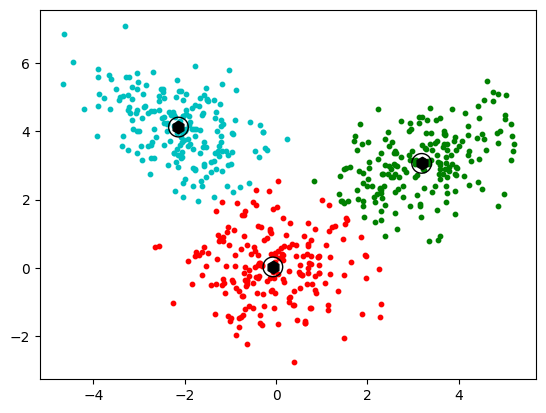

In [6]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

 As it's shown in the plotted resutls, this method works quite well and the devision of the smaples are satisfying enough.
 K-means clustering with the least squares error (LSE) approach has its own set of pros and cons:

Pros:
1. 🌟 Simple and efficient: K-means clustering is a straightforward and computationally efficient algorithm, making it suitable for large datasets.
2. 📊 Quantifiable results: The LSE approach provides a quantitative measure of the goodness of fit, allowing for easier interpretation and comparison of clustering results.
3. 🎯 Defined clusters: K-means with LSE aims to minimize the sum of squared distances from data points to their assigned cluster centers, which often leads to well-defined and compact clusters.

Cons:
1. ⚖️ Sensitivity to initial centroids: K-means clustering is sensitive to the initial selection of cluster centroids, which can result in different cluster assignments and potentially suboptimal solutions.
2. 📈 Not suitable for non-linear data: K-means assumes that clusters are convex and isotropic, making it less effective for datasets with non-linear or irregularly shaped clusters.
3. 🧠 Requires the number of clusters: K-means requires the number of clusters (k) to be specified a priori, which might not always be known or obvious from the data.

Overall, K-means clustering with LSE offers simplicity and efficiency, but it is important to consider its limitations, especially in scenarios with complex or non-linear data distributions.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

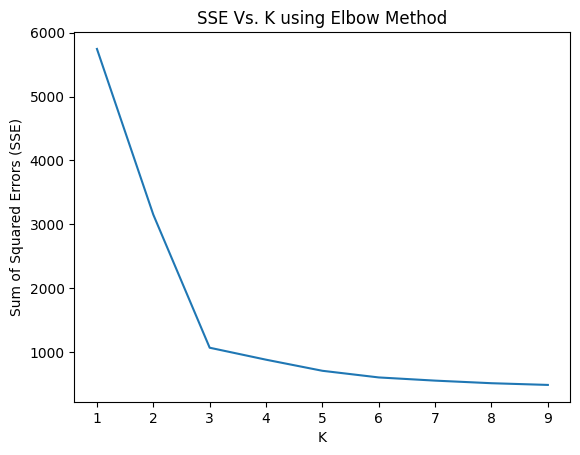

In [7]:
def elbow_method(X, K):
    
    # Initializing S vector    
    S = np.zeros([len(K),1])
    
    # Finding SSE for each K
    for i in range(len(K)):
        # Clustering process
        M, U = kmeans(X, K[i])

        for j in range(K[i]):
            # Finds the points of the cluster
            indexes = np.where(U[:,j]==1)[0]

            # Calculates the SSE
            S[i,0] += np.sum(pow(np.linalg.norm(M[j] - X[indexes], axis=1),2))
    return S


# Initializing K vector
K_Vector = np.arange(1,10,1)

S = elbow_method(X,K_Vector)

# Plotting Results
plt.plot(K_Vector, S)
plt.title("SSE Vs. K using Elbow Method")
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

The "elbow method" is a heuristic used to determine the optimal number of clusters in a dataset for k-means clustering. 📊

It involves running k-means clustering on the dataset for a range of values of k (the number of clusters) and then plotting the within-cluster sum of squares (WCSS) for each value of k. The WCSS is the sum of the squared distances between each point and the centroid of its assigned cluster. 📈

When the plot of the WCSS values is visualized, the "elbow" represents a point where the rate of decrease in WCSS sharply changes, forming a noticeable bend in the plot. This bend or "elbow" point is considered an indication of the optimal number of clusters, as it suggests that adding more clusters does not significantly improve the model's performance. 🔄

Therefore, the elbow method helps in finding a suitable value for k in k-means clustering, aiding in better understanding the structure and patterns within the data.

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [9]:
# TODO: First 25 rows of the dataset
# Loading the file
df = pd.read_csv('sentiment.csv', index_col="PhraseId")

# Displaying the desired values
display(df.loc[0:25, :])

,SentenceId,Phrase,Sentiment
PhraseId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,1,A series of escapades demonstrating the adage ...,2
3,1,A series,2
4,1,A,2
5,1,series,2
6,1,of escapades demonstrating the adage that what...,2
7,1,of,2
8,1,escapades demonstrating the adage that what is...,2
9,1,escapades,2


In [10]:
# TODO: Last 10 rows of the dataset
display(df.loc[9991:10001, :])

,SentenceId,Phrase,Sentiment
PhraseId,,,
9991,419,this a comedy or serious drama,2
9992,419,a comedy or serious drama,2
9993,419,a comedy or,2
9994,419,a comedy,2
9995,419,serious drama,2
9996,420,plays like some corny television production fr...,1
9997,420,plays like some corny television,1
9998,420,like some corny television,2
9999,420,some corny television,1


In [11]:
# TODO: information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SentenceId  10000 non-null  int64 
 1   Phrase      10000 non-null  object
 2   Sentiment   10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 570.5+ KB


Text(0, 0.5, 'Occurence')

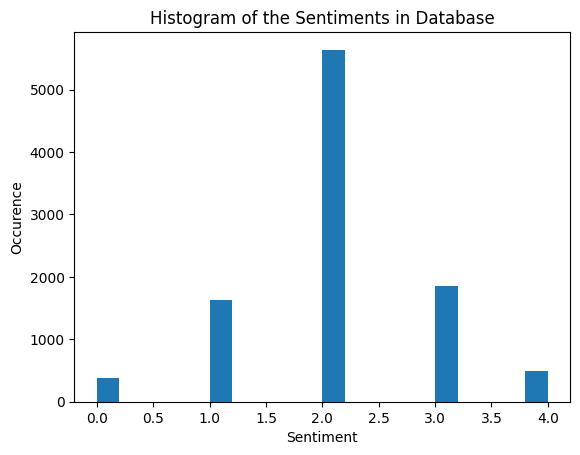

In [12]:
# TODO: histogram of sentiment scores
Sentiments = df['Sentiment']
plt.hist(Sentiments,bins=20)
plt.title("Histogram of the Sentiments in Database")
plt.xlabel("Sentiment")
plt.ylabel("Occurence")

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [13]:
def preprocess_text(text):
    LC_Text = text.lower() # lower-cased text
    C_Text = LC_Text.translate(str.maketrans('', '', string.punctuation)) # Clean text without any punctuation
    
    #Finding the List of stopwords:
    nltk.download('stopwords')
    
    # split the text into words
    words = C_Text.split()

    # remove the stopwords
    filtered_words = [word for word in words if word not in stopwords.words('english')]

    # join the filtered words back into a sentence
    tokenized = ' '.join(filtered_words)
    
    return tokenized

In [14]:
# Apply the preprocessing function to the text column
Phrases = df['Phrase'].apply(preprocess_text)
Phrases.info()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package st

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: Phrase
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 414.3+ KB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package st

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [29]:
# TODO: Extract features from the preprocessed text data

# Initialization
CountVec = CountVectorizer()

# Transform and Fitting
Count_Data = CountVec.fit_transform(Phrases)
Temp_Feature_Matrix = Count_Data.toarray()

183.08467986153292


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [16]:
# TODO: Split the dataset into training and testing sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Count_Data, df['Sentiment'],test_size=0.1,random_state=0)

# TODO: Train a linear regression model
LinRegModel = LinearRegression()
LinRegModel.fit(X_Train, Y_Train)

# TODO: Make predictions on the testing set
Y_Prediction = LinRegModel.predict(X_Test)

# TODO: Evaluate the model using mean squared error
MSE = mean_squared_error(Y_Prediction, Y_Test)
print(f'MSE: {MSE}')
print('MSE is minimized for the Test size of 1000')

MSE: 0.3939649499764132
MSE is minimized for the Test size of 1000


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

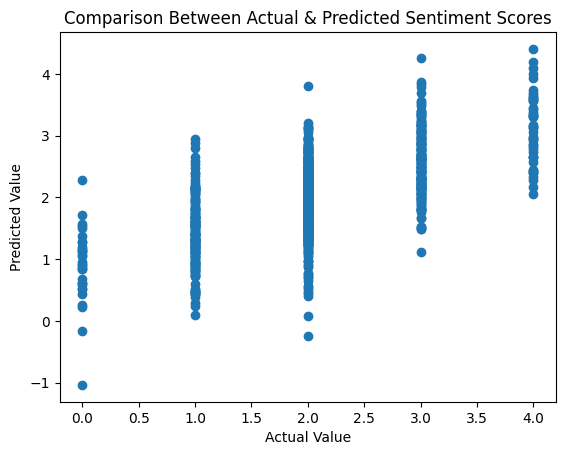

In [17]:
plt.scatter(Y_Test, Y_Prediction)

plt.title("Comparison Between Actual & Predicted Sentiment Scores")
plt.xlabel("Actual Value") 
plt.ylabel("Predicted Value") 
plt.show()

## <font color="red"> Discuss the resulted figure </font>

As it's clear in the above figure, the predicted sentiment scores are centered at the Actual value with an acceptable precision.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [31]:
# Tokenizing the input text
def tokenize(text):
    return text.split()

# Builds a vocabulary of all the unique words in the dataset.
def build_vocabulary(data):
    vocabulary = set()
    for document in data:
        for word in tokenize(document):
            vocabulary.add(word)
    return sorted(list(vocabulary))

# Encodes a document as a vector of word counts.
def encode_document(document, vocabulary):
    document_words = tokenize(document)
    document_vector = np.zeros(len(vocabulary))
    for word in document_words:
        if word in vocabulary:
            document_vector[vocabulary.index(word)] += 1
    return document_vector

# Extracts features from a dataset using the Bag of Words (BoW) method 
# without using the built-in function of sklearn.
def extract_features(Phrases):
    vocabulary = build_vocabulary(Phrases)
    feature_matrix = []
    for document in Phrases:
        document_vector = encode_document(document, vocabulary)
        feature_matrix.append(document_vector)
    return np.array(feature_matrix)

# Using the written function
X = extract_features(Phrases)

# Finding the Difference of the Feature Matrices
Diff = np.linalg.norm(Temp_Feature_Matrix) - np.linalg.norm(X)
print('The Difference in the Norm of Elicited Matrices is: ' + str(Diff))

# As clearly shown, the difference is negligible and thus
# the manual and built-in functions are ended up in a quite similar result


The Difference in the Norm of Elicited Matrices is: -0.13922687555202629
